<a href="https://colab.research.google.com/github/huskey38/huskey01/blob/main/jejucampbitcoinipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import warnings

warnings.filterwarnings(action='ignore')

In [7]:
from fbprophet import Prophet
import pandas as pd

In [9]:
df = pd.read_csv('market-price.csv', names=['ds', 'y'])

In [10]:
df

,ds,y
0,Timestamp,market-price
1,2021-06-05 00:00:00,36885.51
2,2021-06-06 00:00:00,35530.38
3,2021-06-07 00:00:00,35816.17
4,2021-06-08 00:00:00,33514.87
...,...,...
362,2022-06-01 00:00:00,31776.27
363,2022-06-02 00:00:00,29780.81
364,2022-06-03 00:00:00,30429.88
365,2022-06-04 00:00:00,29681.76


In [12]:
df = df.iloc[1:]
df.dtypes

ds    object
y     object
dtype: object

In [13]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df['y'] = df['y'].astype('float64')

df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [14]:
df

,ds,y
2,2021-06-06,35530.38
3,2021-06-07,35816.17
4,2021-06-08,33514.87
5,2021-06-09,33450.19
6,2021-06-10,37338.36
...,...,...
362,2022-06-01,31776.27
363,2022-06-02,29780.81
364,2022-06-03,30429.88
365,2022-06-04,29681.76


In [15]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
예측날짜 = m.make_future_dataframe(periods=30, freq='D')
예측값 = m.predict(예측날짜)
예측값.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
390,2022-07-01,28385.648460,23441.528542,33339.149610,27583.595178,29265.639294,-171.440367,-171.440367,-171.440367,-171.440367,-171.440367,-171.440367,0.0,0.0,0.0,28214.208093
391,2022-07-02,28263.085462,22731.518359,33173.278397,27395.808956,29224.337278,-246.684959,-246.684959,-246.684959,-246.684959,-246.684959,-246.684959,0.0,0.0,0.0,28016.400503
392,2022-07-03,28140.522465,23018.136323,33416.561132,27194.618775,29145.922988,-88.887189,-88.887189,-88.887189,-88.887189,-88.887189,-88.887189,0.0,0.0,0.0,28051.635275
393,2022-07-04,28017.959467,22632.259675,33189.218379,26988.606353,29080.129153,194.778627,194.778627,194.778627,194.778627,194.778627,194.778627,0.0,0.0,0.0,28212.738094
394,2022-07-05,27895.396470,22624.729604,33429.873659,26783.028699,29032.450843,70.519180,70.519180,70.519180,70.519180,70.519180,70.519180,0.0,0.0,0.0,27965.915650


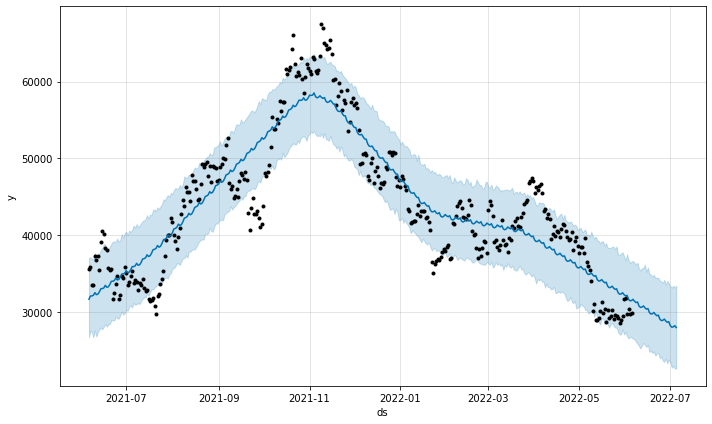

In [18]:
plot1 = m.plot(예측값)

In [27]:
m = Prophet(
    interval_width = 0.8,
    seasonality_mode = 'multiplicative',
    yearly_seasonality = True,
    changepoint_prior_scale = 0.1)

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
예측날짜 = m.make_future_dataframe(periods=60, freq='D')
예측값 = m.predict(예측날짜)
예측값.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
420,2022-07-31,40469.844962,31751.004802,36735.610858,40469.844264,40469.845638,-0.153249,-0.153249,-0.153249,-0.002492,-0.002492,-0.002492,-0.150756,-0.150756,-0.150756,0.0,0.0,0.0,34267.899881
421,2022-08-01,40455.847231,32559.523982,37532.058449,40455.846520,40455.847919,-0.134712,-0.134712,-0.134712,0.003991,0.003991,0.003991,-0.138703,-0.138703,-0.138703,0.0,0.0,0.0,35005.940522
422,2022-08-02,40441.849500,32884.045122,37561.224024,40441.848768,40441.850201,-0.125473,-0.125473,-0.125473,0.001236,0.001236,0.001236,-0.126709,-0.126709,-0.126709,0.0,0.0,0.0,35367.476735
423,2022-08-03,40427.851769,33359.612359,38201.879284,40427.851019,40427.852487,-0.114685,-0.114685,-0.114685,0.000137,0.000137,0.000137,-0.114822,-0.114822,-0.114822,0.0,0.0,0.0,35791.398104
424,2022-08-04,40413.854037,33885.715547,38884.025871,40413.853270,40413.854779,-0.097805,-0.097805,-0.097805,0.005276,0.005276,0.005276,-0.103081,-0.103081,-0.103081,0.0,0.0,0.0,36461.193253


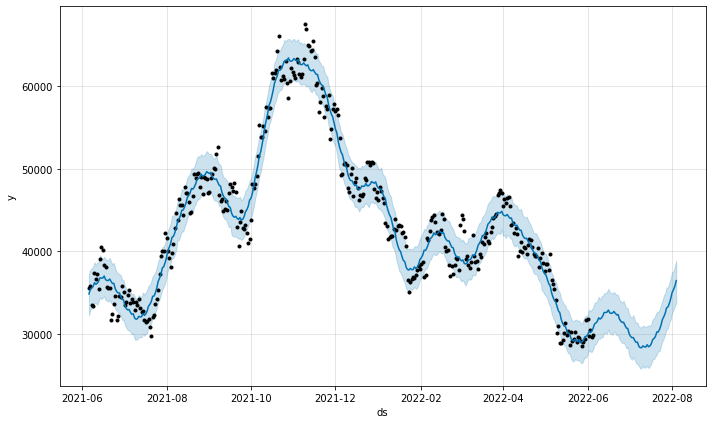

In [31]:
plot1 = m.plot(예측값)
